# Excercise - Data Cleaning and Visualization
This notebook will cover the following:
 - Reading in data using csv
 - Reading in data using pandas
 - Data visualization using matplotlib and seaborn

In [1]:
import csv 
import numpy as np
import os
import pandas as pd
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from pathlib import Path

## Data File

Kindly download the following file from Kaggle (https://www.kaggle.com/starbucks/starbucks-menu) and place it inside your DSDATA folder.

- starbucks_drinkMenu_expanded.csv

This dataset includes the nutritional information for Starbucks’ food and drink menu items. All nutritional information of drinks are for a 12oz serving size.

In [2]:
DSDATA = Path(os.getenv('DSDATA'))
DSDATA

PosixPath('/Users/macbookpro/Desktop/DLSU/9th_Term/DATASCI/DSDATA')

In [3]:
file_nutrition = DSDATA / 'starbucks_drinkMenu_expanded.csv'

### Pandas

`pandas` is a powerful library capable of reading csv, tsv and even Excel files.

Once it reads in your file, it is represented in a tabular format which is a form of **structured** data. When data is loaded, it is called a `DataFrame`.

In [4]:
if file_nutrition.exists():
    print('File exists!')
else:
    print('Please download the file and place it inside the DSDATA folder.')
    
data2 = pd.read_csv(file_nutrition)
data2.head() #check the columns and rows for the first 5 menu items

File exists!


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [ ]:
data2.tail()

### Table 1. Nutrition menu of Starbucks (as of July 20, 2017)

The table above displays the data read in from the csv file which contains the nutrition facts for Starbucks in 2017. This data was filtered and downloaded from this [Kaggle dataset](https://www.kaggle.com/starbucks/starbucks-menu).

`read_csv()` is called to read csv files using pandas.

To have a preview of the data, `head()` is called to display the first 5 rows of the DataFrame. If you want to limit or show more rows, simply pass in any integer into the `head()` function (e.g. calling `data2.head(10)` to show the first 10 rows of the DataFrame).

If you want to show the last 5 rows of the DataFrame, use the `tail()` function instead.

### Q1: Getting to know your dataset 
1. How many rows are there in total?
2. How many columns are there in total?
3. What are the data types of each column?

In [5]:
#Q1.1 = 242
#Q1.2 = 18
data2.shape

(242, 18)

In [6]:
#Q1.3
data2.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

## Data Cleaning

Now that we've read in the data. Let's start exploring and see how *"clean"* the data is.

### Common Data Problems (from slides)

1. Missing values
2. Formatting issues / data types
3. Varying representation / Handle categorical values

### Q2: Missing values
1. How many columns have null values?
2. What do we need to do with these null values?

In [7]:
#Q2.1
data2.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [8]:
#Q2.2
data2['Caffeine (mg)']=data2['Caffeine (mg)'].fillna('0')

In [9]:
data2['Caffeine (mg)'].isnull().sum()

0

We can see that there are no more missing values in the dataset.

### Q3: Formatting issues / data types 
1. `Vitamin A` (% DV), `Vitamin C` (% DV), `Calcium` (% DV), `Iron` (% DV) and `Caffeine` (mg) are supposed to be integers, but they were read as objects. Why is this the case?
2. How do we convert these columns into integer types?
3. Why does the `Caffeine (mg)` column contain the value `Varies`? 

In [10]:
# get random samples
data2.sample(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
181,Frappuccino® Blended Coffee,Coffee,Tall Nonfat Milk,160,0.1,0.0,0.0,0,160,36,0,36,3.0,4%,0%,10%,10%,0
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,4%,0%,8%,2%,90
41,Classic Espresso Drinks,Caffè Americano,Tall,10,0,0.0,0.0,0,10,2,0,0,1.0,0%,0%,2%,0%,150
10,Classic Espresso Drinks,Caffè Latte,Grande Nonfat Milk,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20%,0%,40%,0%,150
73,Signature Espresso Drinks,Caramel Macchiato,Soymilk,250,7,1.5,0.0,5,140,36,1,31,11.0,15%,0%,40%,20%,150


### Table 2. Random samples from the dataset

Table 2 (shown above) displays 5 random samples from the dataset. Random samples give an accurate resprentations of the population, so they were used to check the values of the incorrectly-formatted columns.

To fetch samples from the dataset, we called `data2.sample(5)` which displays 5 random entries in the DataFrame. If you want to limit or get more samples, simply pass any number into the `sample()` function. If no integer was passed, it would only return one random sample.

<b>Q3.1 Answer:</b> As seen in Table 2, all of the columns containing "%" are considered as strings, so we need to remove them to convert the column into the integer type. On the other hand, the `Caffeine (mg)` column contains the word "Varies", resulting in it being represented as a column of strings.

In [6]:
#Q3.2 remove the % in the dataset
data_cleaned = data2.replace({'%': '','varies': '0','Varies': '0'}, regex=True) #we replaced "%" to "" and now  the word "varies"/"Varies" to 0
data_cleaned.iloc[:,-5:] = data_cleaned.iloc[:,-5:].apply(pd.to_numeric) # make the last 5 columns into an integer data type

**Replacing strings:**
- We construct the dictionary `({'%': '','varies': '0','Varies': '0'})` and place it as input in the `replace()` function to substitute **1) '%' to ''**, **2) the word 'varies' to '0'**, and **3) 'Varies' to '0'**.
- The parameter `regex=True` indicates that the column must be considered as a string type, to allow replacement.

**Converting to integer types:**
- `iloc()` means we are accessing the dataframe by number and `[:,-5:]` means we are selecting all rows and the last 5 columns only.
- We use the `apply(pd.to_numeric)` function to convert the last 5 columns from strings to numerical values.

In [7]:
data_cleaned.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


### Table 3. Cleaned dataset

In Table 3, we see that all entries containing '%' was correctly replaced.

In [8]:
data_cleaned.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)               int64
Vitamin C (% DV)               int64
 Calcium (% DV)                int64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object

We check the data types of each column and see that the last 5 columns are now numeric data types.

In [14]:
data2[data2['Caffeine (mg)'].str.contains("Varies|varies")]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6%,0%,10%,0.00%,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4%,0%,10%,6.00%,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10%,0%,20%,0.00%,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3,1.5,0.1,15,75,23,0,23,5.0,8%,0%,15%,0.00%,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,varies


### Table 4. Drinks that have 'Varies' or 'varies' as caffeine amount 

- The table above displays all the drinks that have 'varies' or 'Varies' as entries in the "Caffeine (mg)" column.
- `data2['Caffeine (mg)'].str.contains("Varies|varies")` returns a list containing `True` or `False`, and the indices which has a corresponding `True` value means that the entry contains either **"Varies"** or **"varies"**. 
- We place this list inside `data2` to display a table of all `True` (generated by the inner condition) row values.

<b>Q3.3 Answer: </b>As seen in Table 4, all the Starbucks drinks which contain either **varies** or **Varies** as their caffeine amount are all teas, since the caffeine amount depends on how long the tea was soaked.

### Q4: Aggregation

1. What is the total caffeine amount of all Starbucks drinks?
2. What is the total carb amount of all Starbucks drinks?
3. What are the Starbucks drinks with zero sugar content?

In [15]:
#Q4.1
data_cleaned['Caffeine (mg)'].sum()
#Answer: There are 19,605 mg caffeine in total in the Starbucks drink menu last 2017

19605

In [16]:
#Q4.2
data_cleaned['Calories'].sum()
#Answer: There are 46,917 calories in total in the Starbucks drink menu last 2017

46917

In [17]:
#Q4.3
data_cleaned[' Sugars (g)'].min() # =0
data_cleaned[data_cleaned[' Sugars (g)']==0]['Beverage'].unique()
#We get the drinks containing 0 values in the Sugars column 

array(['Brewed Coffee', 'Caffè Americano', 'Espresso', 'Tazo® Tea'],
      dtype=object)

## Sort
- We separate the drink entries by size to prepare for input

In [20]:
short = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Short')]
tall = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Tall')]
grande = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Grande')]
venti = data_cleaned[data_cleaned['Beverage_prep'].str.contains('Venti')]

s_c=short.append([tall,grande,venti])
s_c=s_c.sort_index()

#pd.concat(short,tall,ignore_index=True)

## Visualization
1. Showing the relationship of two features (using a scatter plot)
2. Showing the amount of caffeine per drink in relation to drink size (using a horizontal stacked bar plot)

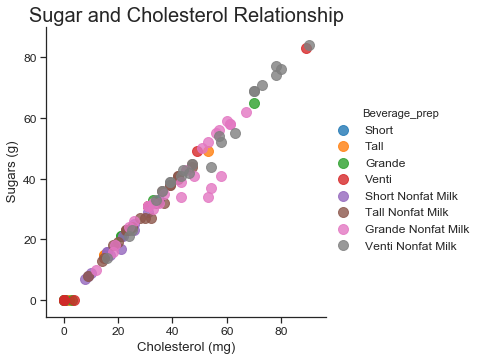

In [22]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Cholesterol (mg)', # Horizontal axis
           ' Sugars (g)', # Vertical axis
           data=s_c, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Beverage_prep", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.title("Sugar and Cholesterol Relationship", fontsize=20)
plt.show()

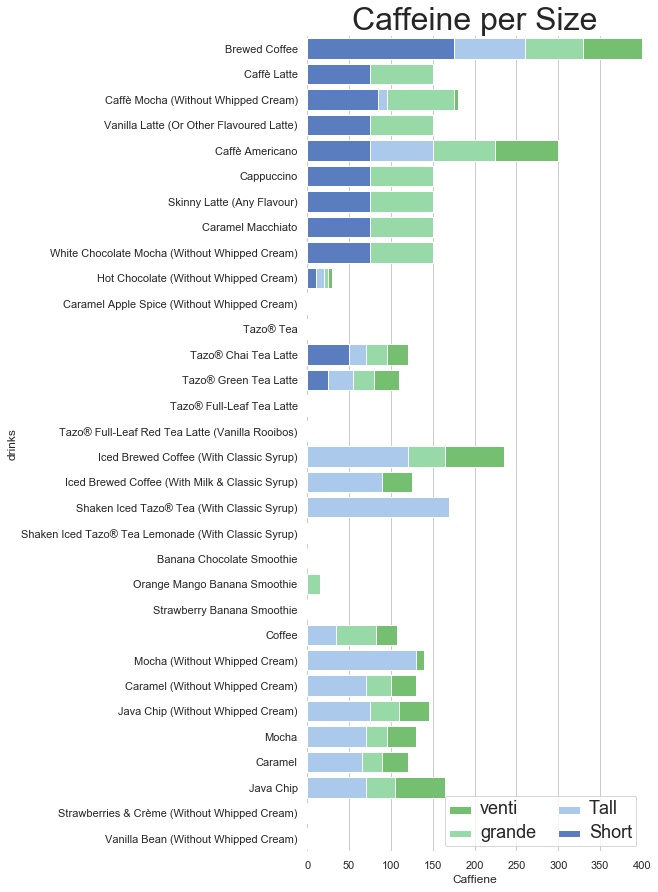

In [23]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 15))
fig = matplotlib.rcParams.update({'font.size':8})

#plot caffeine level of venti drinks
sns.set_color_codes("muted")
sns.barplot(x = venti['Caffeine (mg)'],y=s_c['Beverage'],
            label = "Venti", color="g", ci=None)

#plot caffeine level of grande drinks
sns.set_color_codes("pastel")
sns.barplot(x = grande['Caffeine (mg)'],y = s_c['Beverage'],
            label="Grande", color="g", ci = None)

#plot caffeine level of tall drinks
sns.set_color_codes("pastel")
sns.barplot(x = tall['Caffeine (mg)'],y = s_c['Beverage'],
            label = "Tall", color = "b", ci = None)

#plot caffeine level of short drinks
sns.set_color_codes("muted")
sns.barplot(x = short['Caffeine (mg)'], y = s_c['Beverage'],
            label = 'Short', color ='b', ci = None)

ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(xlim=(0, 400), ylabel="Drink",
       xlabel="Caffeine (mg)")

plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.title("Caffeine amount of each Starbucks drink by size", fontsize=24)
sns.despine(left=True, bottom=True)
plt.show()

### Q5: Visualization

1. Show the relationship between Calories and Carbohydrates.
2. Show the sugar content of each Starbucks drink by size.

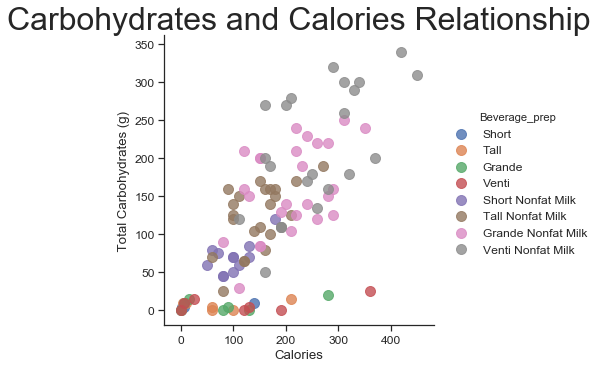

In [27]:
#Q5.1
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Calories', # Horizontal axis
           ' Total Carbohydrates (g) ', # Vertical axis
           data=s_c, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Beverage_prep", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

plt.title("Carbohydrates and Calories Relationship", fontsize=20)
plt.show()

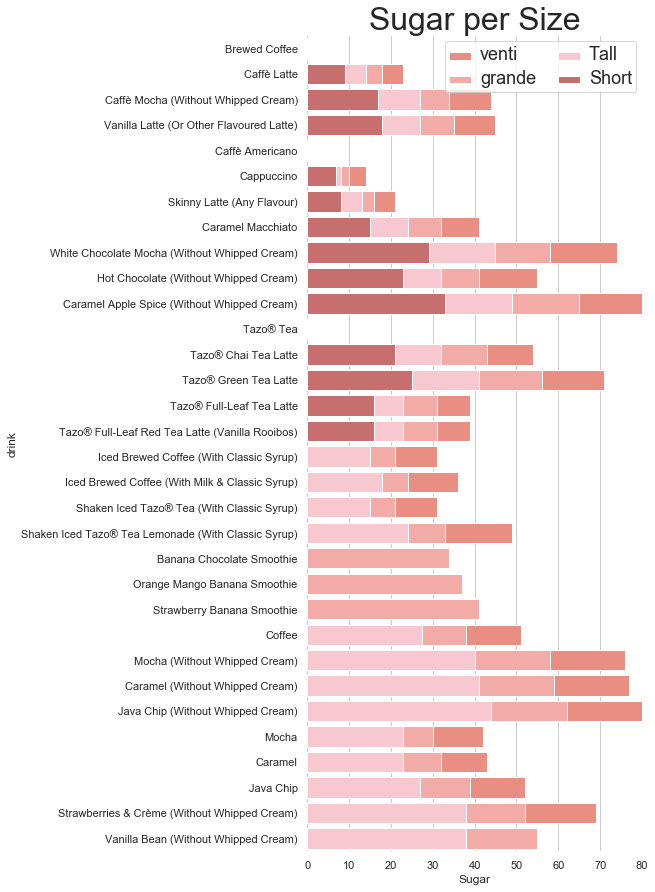

In [26]:
#Q5.2
f, ax = plt.subplots(figsize=(6, 15))
f =matplotlib.rcParams.update({'font.size':10})

sns.set_color_codes("pastel")
sns.barplot(x=venti[' Sugars (g)'],y=s_c['Beverage'],
            label="Venti", color="salmon",ci=None)

sns.set_color_codes("pastel")
sns.barplot(x=grande[' Sugars (g)'],y=s_c['Beverage'],
            label="Grande", color="r",ci=None)

sns.set_color_codes("pastel")
sns.barplot(x=tall[' Sugars (g)'],y=s_c['Beverage'],
            label="Tall", color="pink",ci=None)

sns.set_color_codes("muted")
sns.barplot(x=short[' Sugars (g)'], y=s_c['Beverage'],
            label="Short", color="r",ci=None)

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 80), ylabel="drink",
       xlabel="Sugars (g)")

plt.title("Sugar content of each Starbucks drink by size", fontsize=24)
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
sns.despine(left=True, bottom=True)
plt.show()